# 2.2 Data representations for neural networks

- In the previous example, we started from data stored in **multidimensional Numpy arrays**, also called **tensors**. 
- In general, all current machine-learning systems use **tensors as their basic data structure**. 
- Tensors are fundamental to the field—so fundamental that Google’s TensorFlow was named after them. 

## So what’s a tensor?

- At its core, **a tensor is a container for data**
— Almost always numerical data. So, it’s **a container for numbers** 
- You may be already familiar with **matrices**, which are **2D tensors** 
- Tensors are a generalization of matrices to an arbitrary number of dimensions 
- Note that in the context of tensors, **a dimension** is often called **an axis**

## 2.2.1. Scalars (0D tensors)

- **tensor that contains only one number** is called a **scalar (or scalar tensor, or 0-dimensional tensor, or 0D tensor)**. 
- In Numpy, a float32 or float64 number is a scalar tensor (or scalar array). 
- You can display the number of axes of a Numpy tensor via the ndim attribute; a scalar tensor has 0 axes (ndim == 0). 
- **The number of axes of a tensor** is also called its **rank**.

### Here’s a Numpy scalar:

In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [4]:
x.ndim  ## tensor의 dimension을 알 수 있음.

0

## Vectors (1D tensors)

- **An array of numbers** is called **a vector**, or **1D tensor**. 
- A 1D tensor is said to have exactly one axis. 

### Following is a Numpy vector:

In [5]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [6]:
x.ndim

1

In [8]:
x.shape  ### one - dimension

(5,)

- This vector has five entries and so is called a **5-dimensional vector**. 
- **Don’t confuse a 5D vector with a 5D tensor!** 

-> 5d tensor는 axis가 5개 있는 것(축이 5개,5차원)

-> 여기서 5D vector는 vector(1차원)에 5개의 요소가 있다는 뜻임...

- A 5D vector has only one axis and has five dimensions along its axis, whereas a **5D tensor has five axes** (and may have any number of dimensions along each axis). 
- Dimensionality can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times. 
- In the latter case, it’s technically more correct to talk about **a tensor of rank 5** (the rank of a tensor being the number of axes), but the ambiguous notation 5D tensor is common regardless.

## Matrices (2D tensors)

- An array of vectors is **a matrix, or 2D tensor**. 
- A matrix has two axes (often referred to rows and columns).  ## 행렬
- You can visually interpret a matrix as a rectangular grid of numbers. 

### This is a Numpy matrix:

In [10]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],  
              [7, 80, 4, 36, 2]])

### 3*5 matrix

x.ndim

2

In [11]:
x.shape

(3, 5)

- The entries from **the first axis** are called the **rows**, and the entries from **the second axis** are called the **columns**. 
- In the previous example, [5, 78, 2, 34, 0] is the first row of x, and [5, 6, 7] is the first column.

## 2.2.4. 3D tensors and higher-dimensional tensors

If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. 

### Following is a Numpy 3D tensor:

In [6]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

- By packing 3D tensors in an array, you can create a 4D tensor, and so on. 
- In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data.

## 2.2.5. Key attributes

A tensor is defined by three key attributes:

- **Number of axes (rank)**— For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.
- **Shape**— This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().
- **Data type** (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation.

To make this more concrete, let’s look back at the data we processed in the MNIST example. 

### First, we load the MNIST dataset:

In [12]:
%matplotlib inline
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


Next, we display the number of axes of the tensor train_images, the ndim attribute:

In [13]:
print(train_images.ndim)

3


Here’s its shape:

In [9]:
print(train_images.shape)

(60000, 28, 28)


And this is its data type, the dtype attribute:

In [10]:
print(train_images.dtype)

uint8


- So what we have here is a 3D tensor of 8-bit integers. 
- More precisely, it’s an array of 60,000 matrices of 28 × 28 integers. 
- Each such matrix is a grayscale image, with coefficients between 0 and 255.

Let’s display the fourth digit in this 3D tensor, using the library Matplotlib (part of the standard scientific Python suite); see figure 2.2.

Figure 2.2. The fourth sample in our dataset

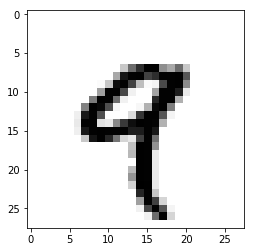

In [14]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [23]:
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## 2.2.6. Manipulating tensors in Numpy

- In the previous example, we selected a specific digit alongside the first axis using the syntax train_images[i]. 
- **Selecting specific elements in a tensor** is called **tensor slicing**. 

-> tensor에서 특정한 부분만 잘라서 가져온다.

### Let’s look at the tensor-slicing operations you can do on Numpy arrays.

In [26]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


It’s equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. Note that : is equivalent to selecting the entire axis:

In [27]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [37]:
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


- In general, you may select between any two indices along each tensor axis. 
- For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you do this:

In [29]:
my_slice2 = train_images[:, 14:, 14:]
print(my_slice2.shape)

(60000, 14, 14)


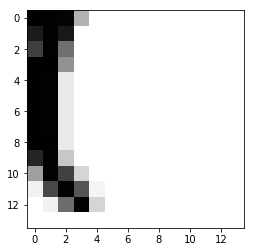

In [30]:
digit2 = my_slice2[4]
#import matplotlib.pyplot as plt
plt.imshow(digit2, cmap=plt.cm.binary)
plt.show()

- It’s also possible to use negative indices. 
- Much like negative indices in Python lists, they indicate a position relative to the end of the current axis. 
- In order to crop the images to patches of 14 × 14 pixels centered in the middle, you do this:

In [31]:
my_slice3 = train_images[:, 7:-7, 7:-7]
print(my_slice3.shape)

(60000, 14, 14)


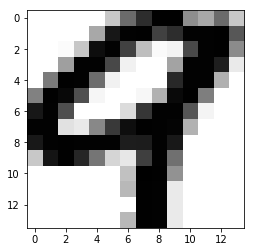

In [32]:
digit3 = my_slice3[4]
plt.imshow(digit3, cmap=plt.cm.binary)
plt.show()

## 2.2.7. The notion of data batches

- In general, **the first axis (axis 0, because indexing starts at 0)** in all data tensors you’ll come across in deep learning will be **the samples axis (sometimes called the samples dimension) **. 
- In the MNIST example, samples are images of digits.

- In addition, deep-learning models don’t process an entire dataset at once; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with batch size of 128:

In [39]:
batch = train_images[:128]

And here’s the next batch:

In [34]:
batch = train_images[128:256]

And the nth batch:

In [35]:
batch = train_images[128 * n:128 * (n + 1)]

NameError: name 'n' is not defined

- When considering such a batch tensor, the first axis (axis 0) is called the **batch axis** or **batch dimension**. 
- This is a term you’ll frequently encounter when using Keras and other deep-learning libraries.

## 2.2.8. Real-world examples of data tensors

Let’s make data tensors more concrete with a few examples similar to what you’ll encounter later. The data you’ll manipulate will almost always fall into one of the following categories:

- **Vector data**— 2D tensors of shape (samples, features)
- **Timeseries data or sequence data**— 3D tensors of shape (samples, timesteps, features)
- **Images**— 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
- **Video**— 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

## 2.2.9. Vector data

- This is the most common case. 
- In such a dataset, each single data point can be encoded as a vector
- A batch of data will be encoded as a 2D tensor (that is, an array of vectors), 
  where the **first axis** is the **samples axis** and the **second axis** is the **features axis**.

Let’s take a look at two examples:

- An actuarial dataset of people, where we consider each person’s age, ZIP code, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a 2D tensor of shape (100000, 3).

- A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).
    
    

## 2.2.10. Timeseries data or sequence data

- Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a 3D tensor with an explicit time axis. 
- Each sample can be encoded as a sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D tensor (see figure 2.3).

<img src = "images/Fig2-3.png">

The time axis is always the second axis (axis of index 1), by convention. 

Let’s look at a few examples:
- A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading is encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250, 390, 3). Here, each sample would be one day’s worth of data.

- A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

## 2.2.11. Image data

Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a one-dimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3) (see figure 2.4).

<img src = "images/Fig2-4.png">

There are two conventions for shapes of images tensors: 
- the channels-last convention (used by TensorFlow) and the channels-first convention (used by Theano). 
- The TensorFlow machine-learning framework, from Google, places the color-depth axis at the end: (samples, height, width, color_depth). - Meanwhile, Theano places the color depth axis right after the batch axis: (samples, color_depth, height, width). 
- With the Theano convention, the previous examples would become (128, 1, 256, 256) and (128, 3, 256, 256). 
- The Keras framework provides support for both formats.

## 2.2.12. Video data

- Video data is one of the few types of real-world data for which you’ll need 5D tensors. 
- A video can be understood as a sequence of frames, each frame being a color image. 
- Because each frame can be stored in a 3D tensor (height, width, color_depth), a sequence of frames can be stored in a 4D tensor (frames, height, width, color_depth), and thus a batch of different videos can be stored in a 5D tensor of shape (-samples, frames, height, width, color_depth).

- For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. 
- A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). 
- That’s a total of 106,168,320 values! 
- If the dtype of the tensor was float32, then each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! 
- Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format).